In [1]:
import pandas as pd
import numpy as np
import os
import math
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
filepath = os.path.abspath('')
filePaths = {
    'ground':filepath+'\\pendulumGround.csv',
    'first':filepath+'\\pendulum114firstfromground.csv',
    'second':filepath+'\\pendulumlowerthan1142ndfromground.csv'
    }
data = {}
baseData = {'ground':{'length':(201.3)/100},
            'first':{'length':(114.5)/100},
            'second':{'length':(142.7)/100}
        }
dataInfo1 = {'ground':{'length':(201.3)/100},
            'first':{'length':(114.5)/100},
            'second':{'length':(142.7)/100}
        }
dataInfo2 = {'ground':{'length':0.32},
            'first':{'length':0.1719},
            'second':{'length':0.2114}
        }
dataInfo3 = {'ground':{'length':baseData['ground']['length']*0.16},
            'first':{'length':baseData['first']['length']*0.16},
            'second':{'length':baseData['second']['length']*0.16}
        }
difference = {'ground':(dataInfo1['ground']['length']-dataInfo2['ground']['length'])/dataInfo1['ground']['length'],
            'first':(dataInfo1['first']['length']-dataInfo2['first']['length'])/dataInfo1['first']['length'],
            'second':(dataInfo1['second']['length']-dataInfo2['second']['length'])/dataInfo1['second']['length']
        }

In [3]:
for i in difference:
    print(dataInfo[i]['length'])
    print(dataInfo2[i]['length'])
    print(i + ' '+str(difference[i]))

0.32208
0.32
ground 0.8410332836562344
0.1832
0.1719
first 0.8498689956331879
0.22831999999999997
0.2114
second 0.8518570427470217


In [4]:
for i in filePaths:
    data[i]=pd.read_csv(filePaths[i])

In [5]:
display(data['ground'])

,Time(ms),Hall(mV),B(mT)
0,0,537.1094,-0.49
1,2,537.1094,-0.49
2,4,537.1094,-0.49
3,12,537.1094,-0.49
4,31,537.1094,-0.49
...,...,...,...
5366,121490,3686.5234,31.01
5367,121515,3959.9609,33.74
5368,121540,3916.0156,33.30
5369,121565,3583.9843,29.98


In [6]:
def gForce(length,period):
    return (4*((math.pi)**2)*length)/(period**2)

length 58.109
peaks 51


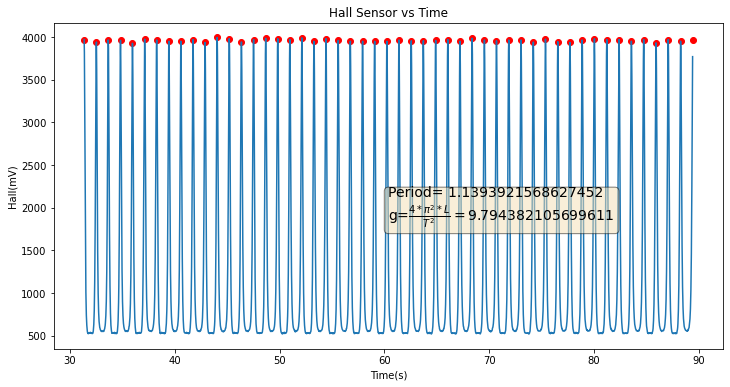

ground
T = 58109ms
9.794382105699611
from Int64Index([1416], dtype='int64') to Int64Index([3990], dtype='int64')
length 42.42
peaks 51


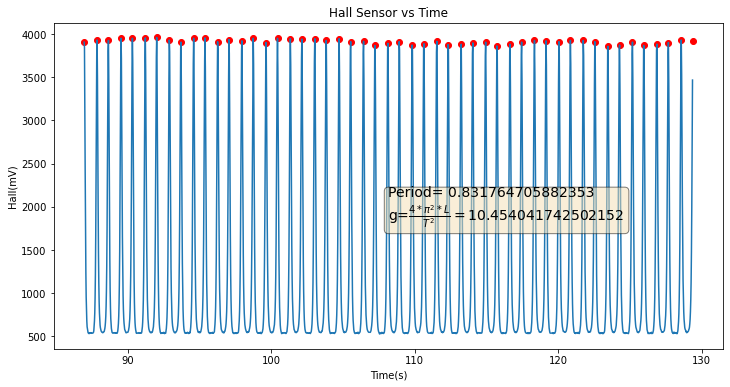

first
T = 42420ms
10.454041742502152
from Int64Index([3881], dtype='int64') to Int64Index([5702], dtype='int64')
length 47.044
peaks 51


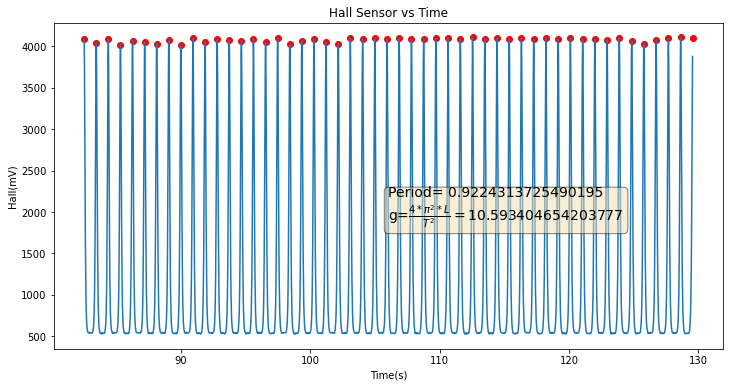

second
T = 47044ms
10.593404654203777
from Int64Index([3687], dtype='int64') to Int64Index([5714], dtype='int64')


In [7]:
lengthList = []
periodList = []
for i in data:
    smallData = data[i]
    peaks = list(find_peaks(smallData['Hall(mV)']))
    filteredPeaks = [x for x in peaks[0] if smallData['Hall(mV)'].iloc[x]>1000]
    #filteredPeaks = list(peaks[0])
    while len(filteredPeaks)>52:
        filteredPeaks.pop(0)
        filteredPeaks.pop()
    peakData = smallData.loc[filteredPeaks]
    firstT =peakData.at[peakData.index[0],'Time(ms)']
    secondT =peakData.at[peakData.index[1],'Time(ms)']
    lastT=peakData.at[peakData.index[len(filteredPeaks)-1],'Time(ms)']

    firstI = smallData.loc[smallData['Time(ms)'] == firstT].index
    secondI = smallData.loc[smallData['Time(ms)'] == lastT].index

    trimmedData = smallData.iloc[firstI[0]:secondI[0]]
    print('length '+str((lastT-firstT)/1000))
    print('peaks '+str(len(filteredPeaks)))
    period = (lastT-firstT)/1000/(len(filteredPeaks))

    xRaw = trimmedData['Time(ms)']/1000
    yRaw = trimmedData['Hall(mV)']
    x2 = peakData['Time(ms)']/1000
    y2 = peakData['Hall(mV)']
    f, ax = plt.subplots(figsize=(12,6))
    if i == 'ground':
        plt.title('Hall Sensor vs Time')
    if i == 'first':
        plt.title('Hall Sensor vs Time')
    if i == 'second':
        plt.title('Hall Sensor vs Time')
    plt.xlabel('Time(s)')
    plt.ylabel('Hall(mV)')
    plt.scatter(x2,y2,c='r')
    plt.plot(xRaw,yRaw)
    strText = '\n'.join((
                'Period= ' + str((period)),
                r'g=$\frac{4*\pi^2*L}{T^2} = $'+str(gForce(dataInfo[i]['length'],period))
            ))
    plt.text(.5, .5, strText, ha='left', va='top', transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),fontsize=14)
    plt.show()
    print(i)
    print('T = ' + str(lastT-firstT) + 'ms')
    print(gForce(dataInfo[i]['length'],period))
    print('from '+ str(firstI)+' to '+str(secondI))

    lengthList.append(float(dataInfo[i]['length']))
    periodList.append(float(period))
lengthList = np.array(lengthList)
periodList = np.array(periodList)

In [8]:
for i in lengthList:
    print(i)
print('')
for i in periodList:
    print(i)

0.32208
0.1832
0.22831999999999997

1.1393921568627452
0.831764705882353
0.9224313725490195


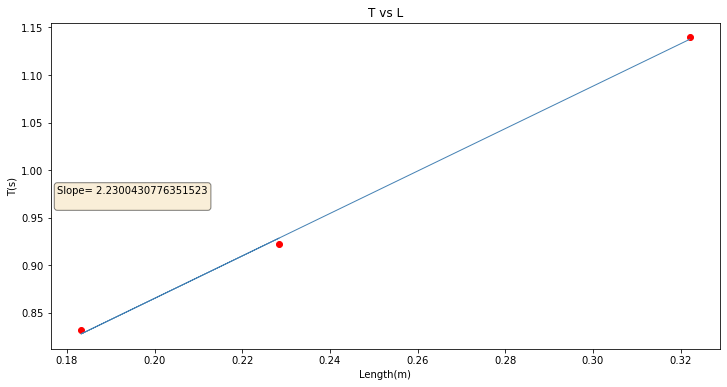

In [9]:
f, ax = plt.subplots(figsize=(12,6))
#plt.figure(figsize=(12,6))
plt.title('T vs L')
plt.xlabel('Length(m)')
plt.ylabel('T(s)')
a, b = np.polyfit(lengthList,periodList, 1)
plt.plot((lengthList), a*(lengthList)+b, color='steelblue', linewidth=1)
plt.scatter(lengthList,periodList,c='r')
strText = '\n'.join((
                'Slope= ' + str(a),
                ''
            ))
#plt.text(0.18,1,strText,fontsize=11,verticalalignment='top',bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(.01, .5, strText, ha='left', va='top', transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

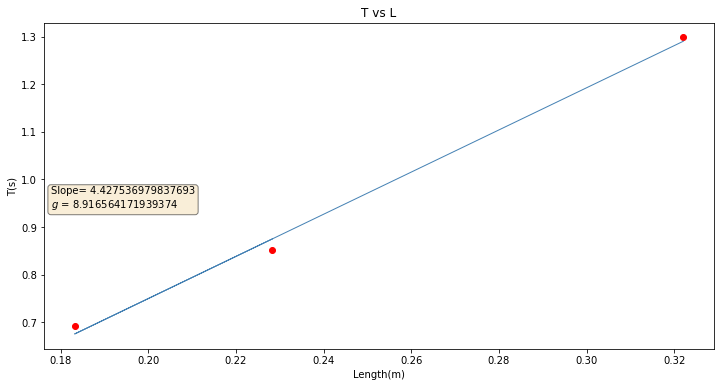

In [10]:
def overG(slope):
    return (4*(math.pi**2))/slope

periodList2=periodList**2
f, ax = plt.subplots(figsize=(12,6))
plt.title('T vs L')
plt.xlabel('Length(m)')
plt.ylabel('T(s)')
a, b = np.polyfit(lengthList,periodList2, 1)
plt.plot((lengthList), a*(lengthList)+b, color='steelblue', linewidth=1)
plt.scatter(lengthList,periodList2,c='r')
strText = '\n'.join((
                'Slope= ' + str(a),
                r'$g$ = ' + str(overG(a))
            ))
plt.text(.01, .5, strText, ha='left', va='top', transform=ax.transAxes,bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()